##### https://towardsdatascience.com/stock-market-action-prediction-with-convnet-8689238feae3

In [1]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import optimizers
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import warnings
import time
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기
df = pd.read_csv('./day_stock_data.csv', encoding= 'utf-8')
df.head()

,Unnamed: 0,날짜,시가,고가,저가,종가,거래량,주가변동
0,0,19800104,42,43,41,41,528022,1
1,1,19800105,40,42,40,42,1580051,1
2,2,19800107,43,44,43,44,2425288,1
3,3,19800108,47,47,45,47,5396669,1
4,4,19800109,47,49,46,49,4993123,1


In [3]:
# 데이터 제거
# df = df.drop(['Unnamed: 0'], 1).drop(['종가'], 1)
df = df.drop(['Unnamed: 0'], 1)
df

,날짜,시가,고가,저가,종가,거래량,주가변동
0,19800104,42,43,41,41,528022,1
1,19800105,40,42,40,42,1580051,1
2,19800107,43,44,43,44,2425288,1
3,19800108,47,47,45,47,5396669,1
4,19800109,47,49,46,49,4993123,1
...,...,...,...,...,...,...,...
11333,20220512,65200,65500,64900,64900,16414188,1
11334,20220513,65300,66700,65200,66500,14551536,0
11335,20220516,67100,67400,66100,66300,11937555,1
11336,20220517,66600,67900,66600,67600,15680447,1


In [4]:
#데이터 제거(1980년부터 10000까지)
df = df.drop(labels=range(0,10000), axis=0)
df

,날짜,시가,고가,저가,종가,거래량,주가변동
10000,20161207,35040,35480,35040,35440,9603650,1
10001,20161208,35980,36020,35520,35800,16462550,0
10002,20161209,35900,35900,35400,35600,10652450,0
10003,20161212,34660,35360,34660,35040,11414450,1
10004,20161213,34620,35440,34620,35320,11684450,1
...,...,...,...,...,...,...,...
11333,20220512,65200,65500,64900,64900,16414188,1
11334,20220513,65300,66700,65200,66500,14551536,0
11335,20220516,67100,67400,66100,66300,11937555,1
11336,20220517,66600,67900,66600,67600,15680447,1


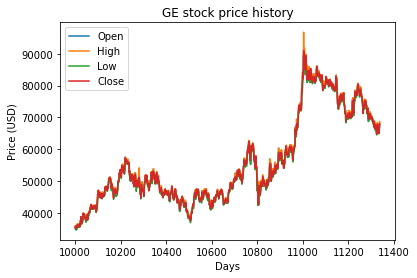

In [5]:
# 그래프 그리기
from matplotlib import pyplot as plt
plt.figure()
plt.plot(df["시가"])
plt.plot(df["고가"])
plt.plot(df["저가"])
plt.plot(df["종가"])
plt.title('GE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

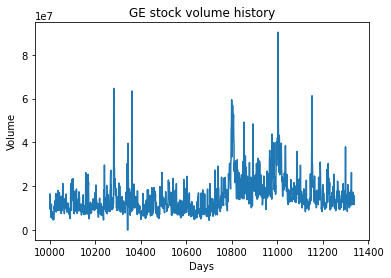

In [6]:
plt.figure()
plt.plot(df["거래량"])
plt.title('GE stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [45]:
print("checking if any null values are present\n", df.isna().sum())

checking if any null values are present
 날짜      0
시가      0
고가      0
저가      0
종가      0
거래량     0
주가변동    0
dtype: int64


##### https://medium.com/the-handbook-of-coding-in-finance/stock-prices-prediction-using-long-short-term-memory-lstm-model-in-python-734dd1ed6827

In [15]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

stock_data = pd.read_csv('./day_stock_data.csv')
stock_data.head()

,Unnamed: 0,날짜,시가,고가,저가,종가,거래량,주가변동
0,0,19800104,42,43,41,41,528022,1
1,1,19800105,40,42,40,42,1580051,1
2,2,19800107,43,44,43,44,2425288,1
3,3,19800108,47,47,45,47,5396669,1
4,4,19800109,47,49,46,49,4993123,1


In [16]:
stock_data = stock_data.drop(['Unnamed: 0'], 1)

In [17]:
stock_data = stock_data.drop(labels=range(0,10000), axis=0)

Text(0, 0.5, 'Prices ($)')

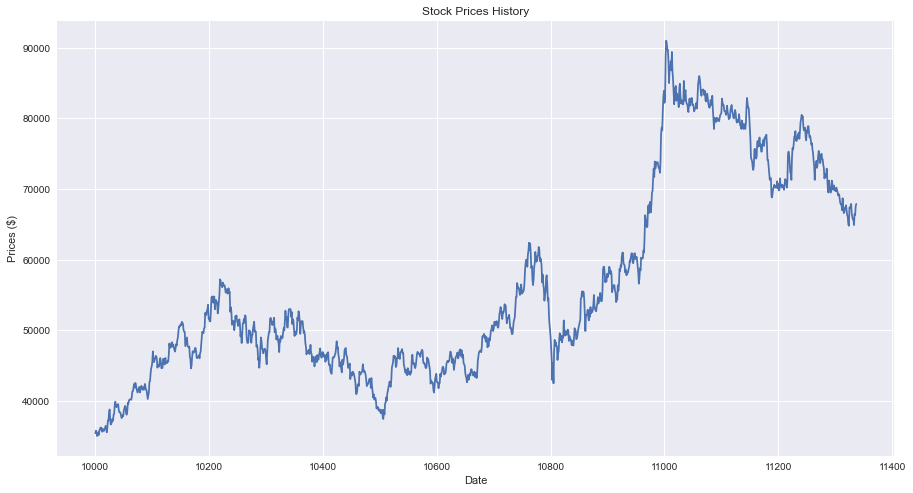

In [18]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['종가'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [19]:
# 데이터 전처리

close_prices = stock_data['종가']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
# 테스트 세트 준비
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
# LSTM 설정
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [27]:
# LSTM 모델 트레이닝
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=20)

Epoch 1/20
1011/1011 [==============================] - 9s 7ms/step - loss: 8.3069e-04
Epoch 2/20
1011/1011 [==============================] - 7s 7ms/step - loss: 8.0087e-04
Epoch 3/20
1011/1011 [==============================] - 7s 7ms/step - loss: 6.5067e-04
Epoch 4/20
1011/1011 [==============================] - 7s 7ms/step - loss: 5.9478e-04
Epoch 5/20
1011/1011 [==============================] - 7s 7ms/step - loss: 7.4746e-04
Epoch 6/20
1011/1011 [==============================] - 7s 7ms/step - loss: 5.4693e-04
Epoch 7/20
1011/1011 [==============================] - 11s 11ms/step - loss: 6.6841e-04
Epoch 8/20
1011/1011 [==============================] - 12s 12ms/step - loss: 5.2247e-04
Epoch 9/20
1011/1011 [==============================] - 11s 11ms/step - loss: 5.7031e-04
Epoch 10/20
1011/1011 [==============================] - 12s 11ms/step - loss: 4.6875e-04
Epoch 11/20
1011/1011 [==============================] - 11s 11ms/step - loss: 4.8410e-04
Epoch 12/20
1011/1011 [========

In [28]:
# 모델 평가
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

9/9 [==============================] - 0s 5ms/step


420.86560744382024

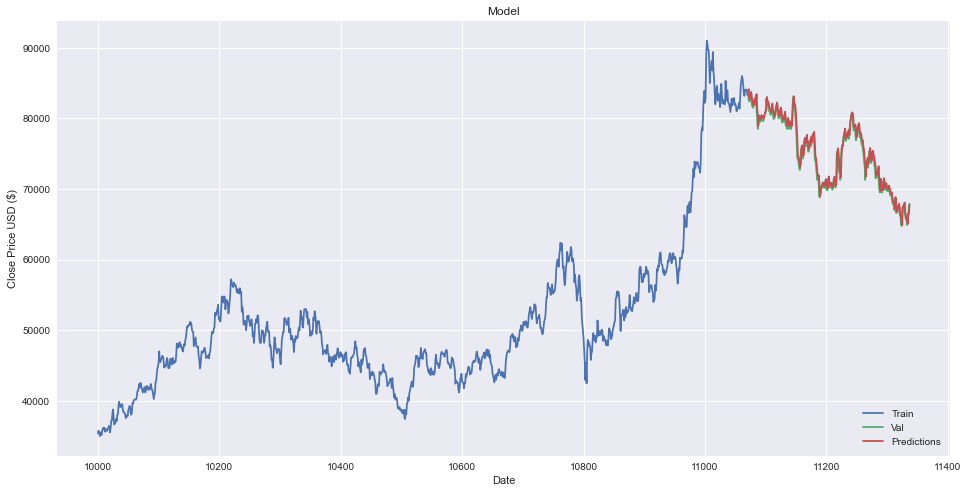

In [29]:
data = stock_data.filter(['종가'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['종가', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()